<a href="https://colab.research.google.com/github/Murtadha9/Titanic_Machine-Learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Dataset
Titanic Survival Prediction Dataset

[https://www.kaggle.com/datasets/yasserh/titanic-dataset/data]

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [1]:
! kaggle datasets download yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 30.9MB/s]


In [2]:
! unzip /content/titanic-dataset.zip

Archive:  /content/titanic-dataset.zip
  inflating: Titanic-Dataset.csv     


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, feature_selection, svm, metrics, pipeline, preprocessing , impute , tree , ensemble , neighbors , linear_model
import seaborn as sns
from tqdm import tqdm
from imblearn.over_sampling import RandomOverSampler , SMOTE

In [4]:
dataset=pd.read_csv("/content/Titanic-Dataset.csv")

In [5]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
dataset.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
dataset.drop(columns=["PassengerId", "Name", "Cabin", "Ticket" ,"Age"], inplace=True)

In [19]:
dataset.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#One_Hot Encoder

In [21]:
columns_to_encode = [
    "Sex", "Embarked"
]


encoders = {}

# Apply LabelEncoder to each column
for column in columns_to_encode:
    encoder = preprocessing.LabelEncoder()
    dataset[column] = encoder.fit_transform(dataset[column])
    encoders[column] = encoder

#Balance the dataset

In [11]:
dataset["Survived"].value_counts()

,count
Survived,
0,549
1,342


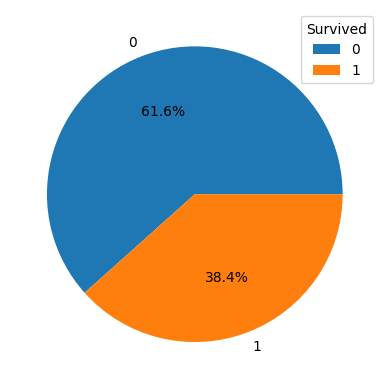

In [12]:
counts = dataset["Survived"].value_counts()
labels = counts.index

# Plot the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.legend(title="Survived")
plt.show()

In [23]:
x = dataset.drop("Survived", axis=1)
y = dataset["Survived"]

In [24]:
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

In [25]:
y.value_counts()

,count
Survived,
0,549
1,549


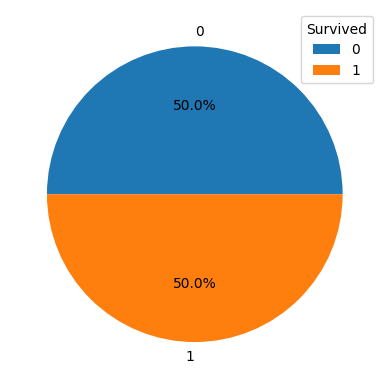

In [27]:
labels = counts.index

plt.pie(y.value_counts(), labels=labels, autopct='%1.1f%%')
plt.legend(title="Survived")
plt.show()

#Normalize the features

In [28]:
# First of all call the   StandardScaler class
x_normalizer = preprocessing.StandardScaler()
# Use the fit method to get mean and std from the features
x_normalizer.fit(x)
# Apply the StandardScaler transformation on the features
x_norm = x_normalizer.transform(x)

#Cross Validation

In [51]:
def train_test_split(x, y, train_indices, test_indices):
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

In [70]:
shuffle_k_fold = model_selection.ShuffleSplit(
    n_splits=10, random_state=42
)  # splits the data into 10 splits, using 9 for training and 1 for testing in each iteration

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in shuffle_k_fold.split(x_norm):
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        x_norm, y, train_indices, test_indices
    )

    # Train model
    #Model=linear_model.LogisticRegression()
    Model = svm.SVC(kernel="rbf")
    #Model=neighbors.KNeighborsClassifier(n_neighbors=5)
    #Model=tree.DecisionTreeClassifier()
    Model.fit(x_train, y_train)

    # Predict using test set
    y_pred = Model.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred))
    recall.append( metrics.recall_score(y_test, y_pred ))
    f1_score.append(metrics.f1_score(y_test, y_pred ))

In [71]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy,
                          "precision": precision,
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.854545,0.920000,0.793103,0.851852
1,0.800000,0.740000,0.804348,0.770833
2,0.781818,0.866667,0.684211,0.764706
3,0.800000,0.959184,0.701493,0.810345
4,0.800000,0.900000,0.725806,0.803571
5,0.781818,0.727273,0.727273,0.727273
6,0.781818,0.812500,0.722222,0.764706
7,0.809091,0.826923,0.781818,0.803738
8,0.809091,0.807692,0.792453,0.800000
9,0.781818,0.826923,0.741379,0.781818


In [72]:
scores_df.mean()

,0
accuracy,0.800000
precision,0.838716
recall,0.747411
F1,0.787884


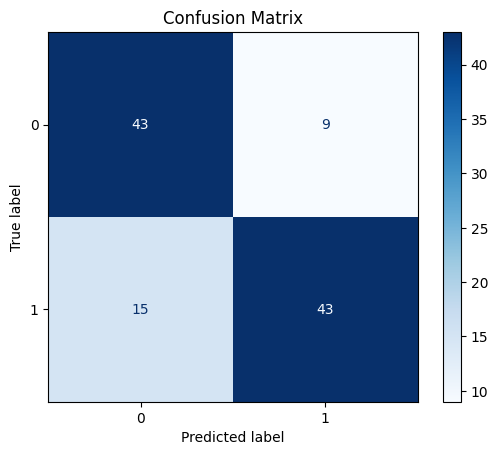

In [73]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()